In [1]:
%run eval.ipynb
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from utils import eval, visual, save, save_model
from model import Model
import warnings
warnings.filterwarnings('ignore')

In [2]:

np.random.seed(42)
data = pd.read_csv('data/compound_feat2.csv').iloc[:,1:]
data['target'] = pd.qcut(data['label'], q=10, labels=False)
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=43)

samples = train_df[train_df['label'] < 1.2]
train_df = pd.concat([train_df, samples], axis=0)
#train_df = pd.concat([train_df, samples], axis=0)
train_df = train_df.sample(frac=1).reset_index(drop=True)

train_df = train_df.drop(columns=['target'])
test_df = test_df.drop(columns=['target'])

X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1:].values
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1:].values

print('train data:', X_train.shape)
print('X_test data:', X_test.shape)

train data: (135, 29)
X_test data: (30, 29)


# 1.DecisionTree_model

DecisionTree train: 
 r2: 1.0  rmse: 0.0  mse:0.0 error_ratio:0.0% mae:0.0
DecisionTree test: 
 r2: 0.6696985924724049  rmse: 0.19165942015286735 mse:0.03673333333333333 error_ratio:9.25% mae:0.1046666666666667
save result successful！


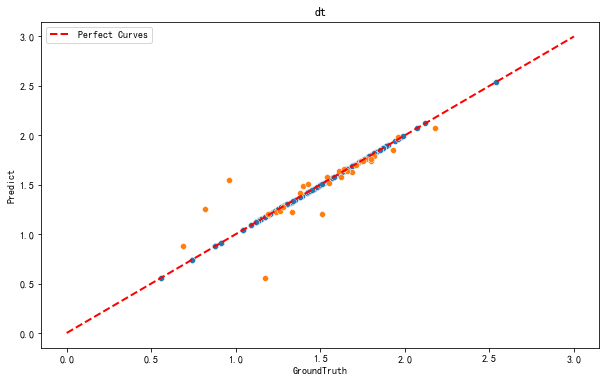

In [3]:
DecisionTree_model = DecisionTreeRegressor(random_state=25)


model = Model(DecisionTree_model, X_train, X_test, y_train, y_test, 'DecisionTree', '2')


visual(DecisionTree_model, 'dt', X_train, X_test, y_train, y_test)



DecisionTree_tuning train: 
 r2: 0.9654939405867551  rmse: 0.06317670691240795  mse:0.003991296296296296 error_ratio:1.89% mae:0.031197530864197534
DecisionTree_tuning test: 
 r2: 0.6354824405404182  rmse: 0.20134191022937775 mse:0.04053856481481481 error_ratio:10.42% mae:0.11944444444444445
save result successful！


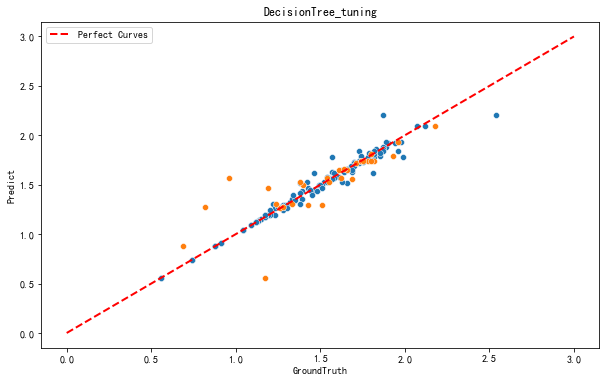

In [4]:
import numpy as np
from sklearn.model_selection import GridSearchCV


DT_param = {'max_depth':[3,5,7,9,10,11],
              'max_leaf_nodes':[25,30,40,50,60,70],
              'min_samples_leaf':[2,3,4,5,6,7,8],
}



D_model = DecisionTreeRegressor()
D_grid_search = GridSearchCV(D_model,DT_param,scoring='neg_mean_squared_error',cv=5)

model = Model(D_grid_search, X_train, X_test, y_train, y_test, 'DecisionTree_tuning', '2')

visual(model, 'DecisionTree_tuning', X_train, X_test, y_train, y_test)
    


# 2.RandomForest_model

RandomForest train: 
 r2: 0.968919493652836  rmse: 0.05995885688135267  mse:0.0035950645185185326 error_ratio:2.56% mae:0.03607629629629651
RandomForest test: 
 r2: 0.7300148545714673  rmse: 0.1732785849434373 mse:0.03002546800000002 error_ratio:9.11% mae:0.1132933333333335
save result successful！


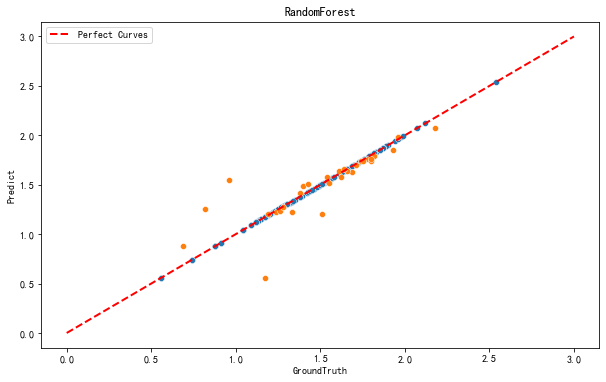

In [5]:
RandomForest_model =RandomForestRegressor(random_state=2024)  #n_estimators=300, max_depth=10, random_state=2023

model = Model(RandomForest_model, X_train, X_test, y_train, y_test, 'RandomForest', '2')


visual(DecisionTree_model, 'RandomForest', X_train, X_test, y_train, y_test)

RandomForest_tuning train: 
 r2: 0.915490020494439  rmse: 0.0988697190047921  mse:0.009775221336086548 error_ratio:5.46% mae:0.07341885648820468
RandomForest_tuning test: 
 r2: 0.6918882124783743  rmse: 0.1851096733703639 mse:0.034265591175282814 error_ratio:10.14% mae:0.12671852755029492
save result successful！


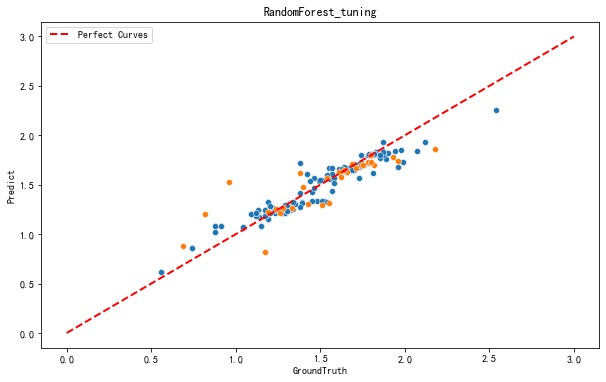

In [6]:


from sklearn.model_selection import GridSearchCV
rf_param = {
    'n_estimators': [300,400,500],
    'max_depth': [3,4,5],
#     'ccp_alpha': [0.0,0.05,0.1],
    'random_state': [2024]
}

rf_model = RandomForestRegressor(random_state=2024)

rf_grid_search = GridSearchCV(rf_model, rf_param, cv=5, scoring='neg_mean_squared_error')

model = Model(rf_grid_search, X_train, X_test, y_train, y_test, 'RandomForest_tuning', '2')

visual(model, 'RandomForest_tuning', X_train, X_test, y_train, y_test)

# 3. Linear_model

linear_reg train: 
 r2: 0.8409820714912044  rmse: 0.1356226879402354  mse:0.018393513484134476 error_ratio:8.22% mae:0.10481920552056734
linear_reg test: 
 r2: 0.7911980940685706  rmse: 0.15238498863601707 mse:0.02322118476159905 error_ratio:8.41% mae:0.11666914413911772
save result successful！


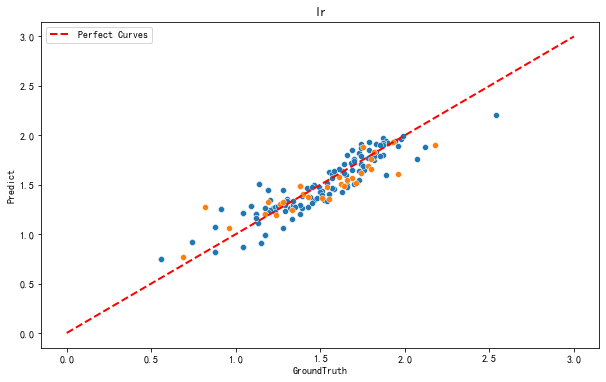

In [7]:
Linear_model = LinearRegression()

model = Model(Linear_model, X_train, X_test, y_train, y_test, 'linear_reg', '2')

visual(model, 'lr', X_train, X_test, y_train, y_test)

linear_reg_tuning train: 
 r2: 0.8409820714912044  rmse: 0.1356226879402354  mse:0.018393513484134476 error_ratio:8.22% mae:0.10481920552056734
linear_reg_tuning test: 
 r2: 0.7911980940685706  rmse: 0.15238498863601707 mse:0.02322118476159905 error_ratio:8.41% mae:0.11666914413911772
save result successful！


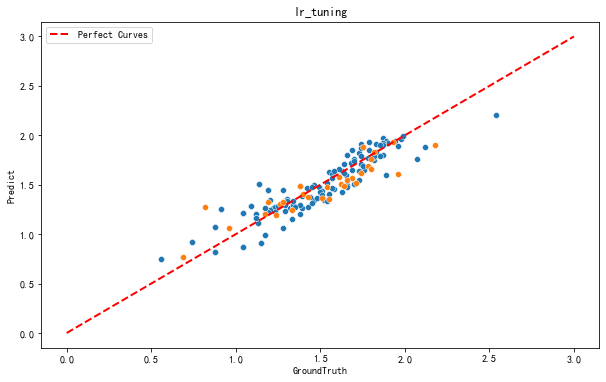

In [8]:
from sklearn.model_selection import GridSearchCV

L_para = {'fit_intercept': [True, False],   
          'normalize': [True, False],      
    
}

L_model = LinearRegression()
L_grid_search = GridSearchCV(L_model,L_para,scoring='neg_mean_squared_error',cv=5)

model = Model(L_grid_search, X_train, X_test, y_train, y_test, 'linear_reg_tuning', '2')

visual(model, 'lr_tuning', X_train, X_test, y_train, y_test)
    

# 4. Lasso

lasso train: 
 r2: 0.5738775720676743  rmse: 0.22201202499747447  mse:0.049289339243479224 error_ratio:12.51% mae:0.15352982054128428
lasso test: 
 r2: 0.5378898313752165  rmse: 0.22669801651272176 mse:0.05139199069080227 error_ratio:13.16% mae:0.1725983486792056
save result successful！


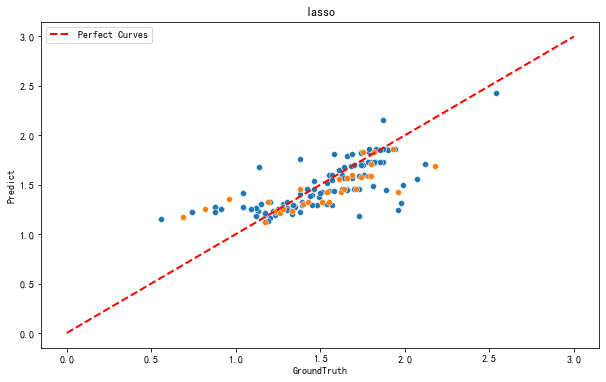

In [3]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(random_state=2024)  # alpha=0.9

model = Model(lasso_model, X_train, X_test, y_train, y_test, 'lasso', '2')

visual(model, 'lasso', X_train, X_test, y_train, y_test)

lasso_tuning train: 
 r2: 0.817952244682455  rmse: 0.14511154493159886  mse:0.02105736047243543 error_ratio:8.74% mae:0.11200145254515775
lasso_tuning test: 
 r2: 0.7831591884033682  rmse: 0.1552907079177327 mse:0.02411520396559057 error_ratio:8.62% mae:0.11984000607087081
save result successful！


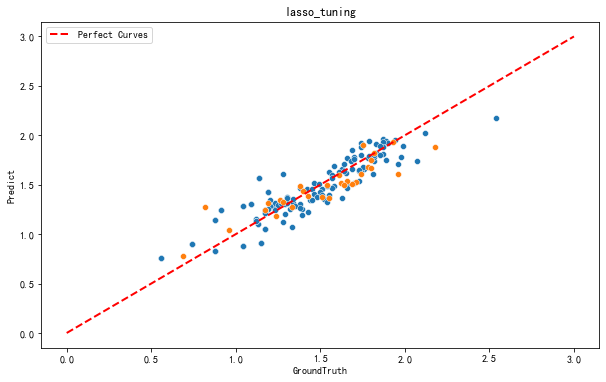

In [4]:
from sklearn.model_selection import GridSearchCV

La_para = {'alpha': [0.001,0.005,0.05],
           'selection': ['cyclic']
}

La_model = Lasso(random_state=2024)
La_grid_search = GridSearchCV(La_model,La_para,scoring='neg_mean_squared_error',cv=5)
La_grid_search.fit(X_train, y_train)



model = Model(La_grid_search, X_train, X_test, y_train, y_test, 'lasso_tuning', '2')

visual(model, 'lasso_tuning', X_train, X_test, y_train, y_test)

# 5. ridge_model

ridge train: 
 r2: 0.8169744658521421  rmse: 0.14550072025407962  mse:0.02117045959445593 error_ratio:8.76% mae:0.11268115341673854
ridge test: 
 r2: 0.7670963909183331  rmse: 0.16093965533850005 mse:0.02590157266047519 error_ratio:8.79% mae:0.12243394796199197
save result successful！


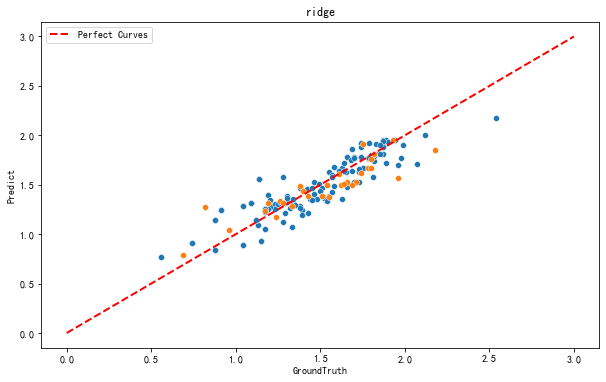

In [5]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(random_state=2024, alpha=5)  # alpha=0.5 

model = Model(ridge_model, X_train, X_test, y_train, y_test, 'ridge', '2')

visual(model, 'ridge', X_train, X_test, y_train, y_test)

ridge_tuning train: 
 r2: 0.8111439167138113  rmse: 0.14780012145499274  mse:0.021844875902110608 error_ratio:8.83% mae:0.11368759267183387
ridge_tuning test: 
 r2: 0.7582821486175928  rmse: 0.16395675728003437 mse:0.026881818257784098 error_ratio:8.85% mae:0.1231496569953392
save result successful！


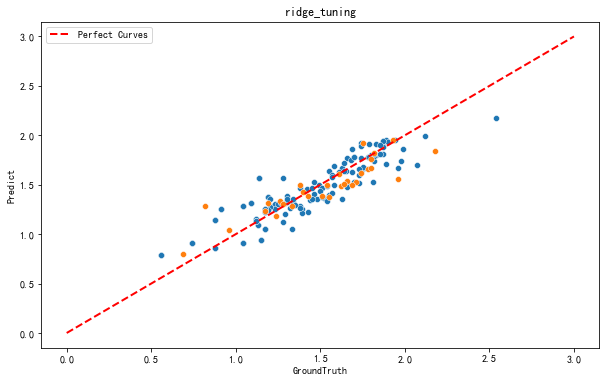

In [6]:
from sklearn.model_selection import GridSearchCV

R_para = {
    'alpha': [0.001, 0.01,0.1,0.5,5,10],  # 正则化参数
}

R_model = Ridge(random_state=2024)
R_grid_search = GridSearchCV(R_model,R_para,scoring='neg_mean_squared_error',cv=5)

R_grid_search.fit(X_train, y_train)



model = Model(R_grid_search, X_train, X_test, y_train, y_test, 'ridge_tuning', '2')

visual(model, 'ridge_tuning', X_train, X_test, y_train, y_test)

# 6. svm_model

svm train: 
 r2: 0.8248594371272132  rmse: 0.14233203941823278  mse:0.02025840944495337 error_ratio:8.88% mae:0.1105190579825115
svm test: 
 r2: 0.7818792211114306  rmse: 0.1557483583193967 mse:0.02425755111918719 error_ratio:8.9% mae:0.11982270059105073
save result successful！


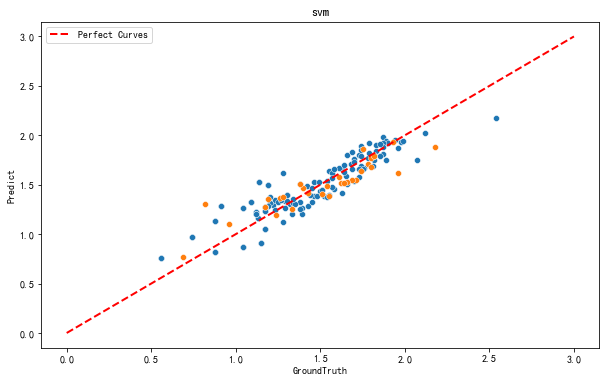

In [13]:
from sklearn import svm
svm_model = svm.SVR(kernel='linear',degree=1,gamma='scale',tol=0.001)

model = Model(svm_model, X_train, X_test, y_train, y_test, 'svm', '2')

visual(model, 'svm', X_train, X_test, y_train, y_test)

svm_tuning train: 
 r2: 0.8013930864127172  rmse: 0.1515676380548618  mse:0.022972748905529583 error_ratio:7.77% mae:0.10573372394226571
svm_tuning test: 
 r2: 0.7553827396495432  rmse: 0.1649371578490203 mse:0.027204266039312634 error_ratio:8.53% mae:0.1226110265025579
save result successful！


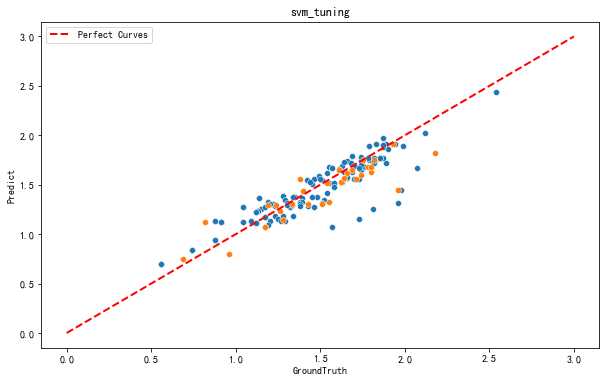

In [14]:
from sklearn.model_selection import GridSearchCV

S_model = svm.SVR()

S_para = {
     'C': [0.1, 1, 10],
    'tol': [0.001, 0.002],
}


S_grid_search = GridSearchCV(S_model,S_para,scoring='neg_mean_squared_error',cv=5)

model = Model(S_grid_search, X_train, X_test, y_train, y_test, 'svm_tuning', '2')

visual(model, 'svm_tuning', X_train, X_test, y_train, y_test)


# 7. elastic net

elastic_net train: 
 r2: 0.5986775519433278  rmse: 0.2154547276232331  mse:0.04642073965520156 error_ratio:12.08% mae:0.14890658014186403
elastic_net test: 
 r2: 0.5445533485801537  rmse: 0.22505761612744854 mse:0.05065093057696998 error_ratio:12.9% mae:0.1690226564686011
save result successful！


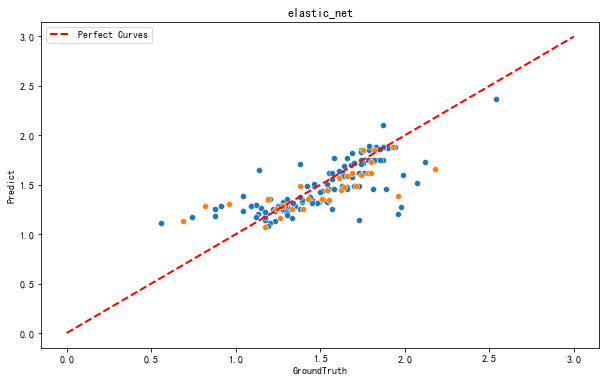

In [7]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(random_state=2024)   # selection='cyclic'

model = Model(elastic_model, X_train, X_test, y_train, y_test, 'elastic_net', '2')

visual(model, 'elastic_net', X_train, X_test, y_train, y_test)

elastic_net_tuning train: 
 r2: 0.7833050144781749  rmse: 0.15831925313732284  mse:0.025064985913959708 error_ratio:9.13% mae:0.11780310253782764
elastic_net_tuning test: 
 r2: 0.7413736182662766  rmse: 0.16959434607413157 mse:0.028762242220312303 error_ratio:9.05% mae:0.12433296626807183
save result successful！


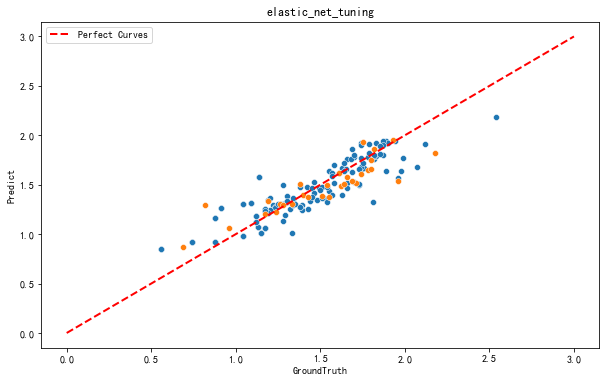

In [8]:
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn.model_selection import GridSearchCV




EN_para = {
    'alpha': [0,0.1,0.5,1],         
    'l1_ratio': [0.0001,0.001,0.005,0.05,0.1,0.5,0.9],      
}

EN_model = ElasticNet()
EN_grid_search = GridSearchCV(EN_model,EN_para,scoring='neg_mean_squared_error', cv=5)

EN_grid_search.fit(X_train, y_train)


model = Model(EN_grid_search, X_train, X_test, y_train, y_test, 'elastic_net_tuning', '2')

visual(model, 'elastic_net_tuning', X_train, X_test, y_train, y_test)

# 8. gaussian_process

gaussian train: 
 r2: 0.8833940646404079  rmse: 0.11613673976132342  mse:0.013487742322389362 error_ratio:6.74% mae:0.08560203045589367
gaussian test: 
 r2: 0.8221971172358038  rmse: 0.14061911383047593 mse:0.019773735174468347 error_ratio:7.29% mae:0.10132564383434751
save result successful！


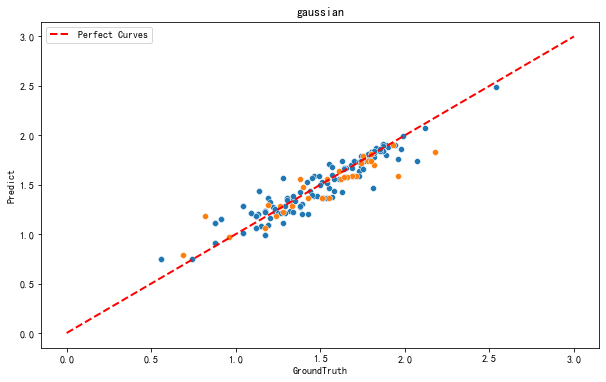

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import GridSearchCV

gaussian_model = GaussianProcessRegressor(kernel = 1.0 * RBF(length_scale=1.0), alpha=0.02, random_state=2024)

model = Model(gaussian_model, X_train, X_test, y_train, y_test, 'gaussian', '2')

visual(model, 'gaussian', X_train, X_test, y_train, y_test)

GaussianProcessRegressor_tuning train: 
 r2: 0.9053536546785348  rmse: 0.10463120477925082  mse:0.01094768901355752 error_ratio:6.04% mae:0.07627917593407134
GaussianProcessRegressor_tuning test: 
 r2: 0.8513271462752359  rmse: 0.1285851442881898 mse:0.01653413933161459 error_ratio:6.99% mae:0.09754281410217906
save result successful！


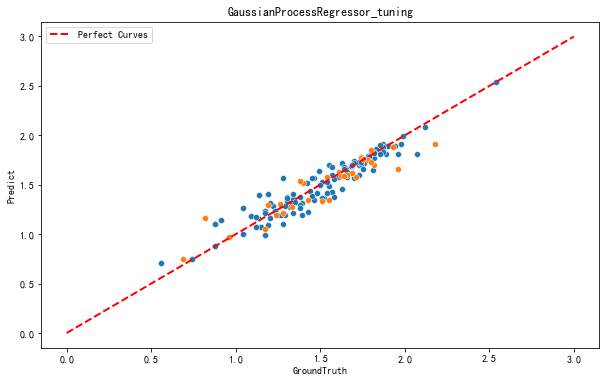

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV


kernel_1 = 1 * RBF(length_scale=1)
kernel_2 = 1.0 * Matern(length_scale=1.0, nu=1.5)

GS_grid = {
    "kernel": [kernel_1],
    "alpha": [0.01,0.02,0.03],
#     "n_restarts_optimizer": [1],
    'random_state':[2024],
}


gpr = GaussianProcessRegressor()

GS_grid_search = GridSearchCV(gpr, GS_grid, scoring='neg_mean_squared_error', cv=5)

model = Model(GS_grid_search, X_train, X_test, y_train, y_test, 'GaussianProcessRegressor_tuning', '2')

visual(model, 'GaussianProcessRegressor_tuning', X_train, X_test, y_train, y_test)

In [35]:
GaussianProcessRegressor?

# 9. KNN

knn train: 
 r2: 0.7403415266835331  rmse: 0.1733047839736346  mse:0.030034548148148155 error_ratio:8.29% mae:0.10957037037037039
knn test: 
 r2: 0.7940010230751399  rmse: 0.15135873501937935 mse:0.02290946666666669 error_ratio:8.4% mae:0.1168666666666667
save result successful！


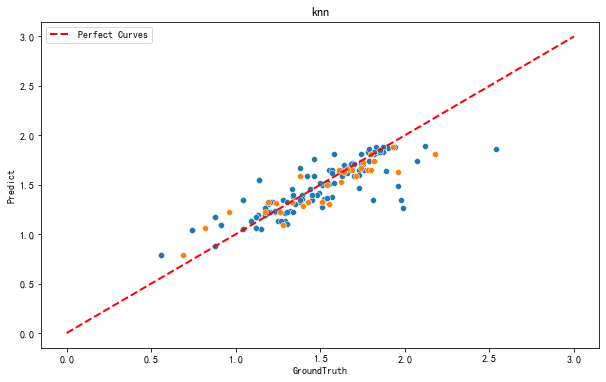

In [9]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_model = KNeighborsRegressor()

model = Model(KNeighbors_model, X_train, X_test, y_train, y_test, 'knn', '2')

visual(model, 'knn', X_train, X_test, y_train, y_test)

knn_tuning train: 
 r2: 0.8574161531413914  rmse: 0.12842348925563654  mse:0.016492592592592597 error_ratio:6.24% mae:0.08412345679012347
knn_tuning test: 
 r2: 0.8583280714234331  rmse: 0.12552113589175157 mse:0.01575555555555556 error_ratio:6.14% mae:0.08733333333333333
save result successful！


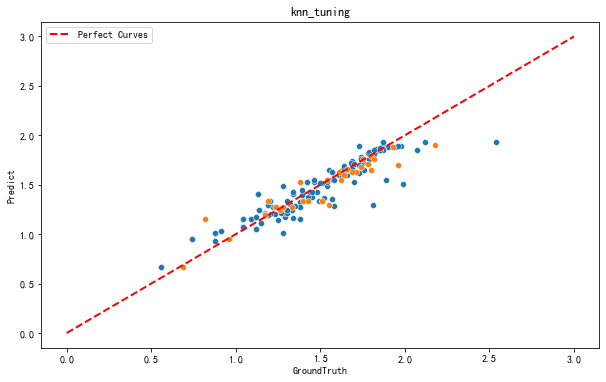

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV

knn_grid = {
    'n_neighbors': [3,4,5],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
    'p': [1, 2],
}


knn = KNeighborsRegressor()

knn_grid_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5)

knn_grid_search.fit(X_train, y_train)


model = Model(knn_grid_search, X_train, X_test, y_train, y_test, 'knn_tuning', '2')

visual(model, 'knn_tuning', X_train, X_test, y_train, y_test)


In [20]:
KNeighborsRegressor?

# 10.XGBoost 

XGBoost train: 
 r2: 0.9999327962404473  rmse: 0.002788085490505519  mse:7.773420702367401e-06 error_ratio:0.12% mae:0.0018446489616676547
XGBoost test: 
 r2: 0.8919919931640103  rmse: 0.10959807686581681 mse:0.01201173845268549 error_ratio:5.49% mae:0.06401985804239911
save result successful！


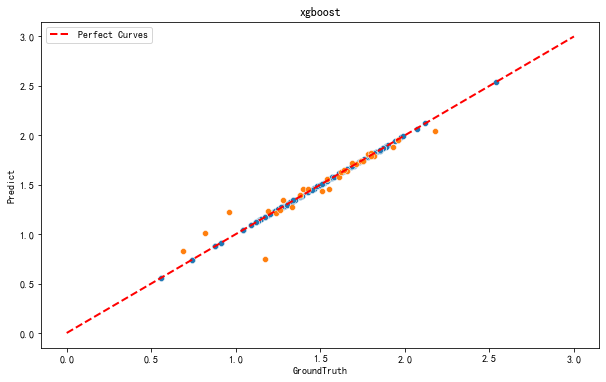

In [23]:
import xgboost as xgb
from xgboost import XGBRegressor

XGBoost_model = XGBRegressor(random_state=2024)

model = Model(XGBoost_model, X_train, X_test, y_train, y_test, 'XGBoost', '2')

# 可视化
visual(model, 'xgboost', X_train, X_test, y_train, y_test)

XGBoost_tuning train: 
 r2: 0.9858077057573599  rmse: 0.040516843598986815  mse:0.0016416146152247587 error_ratio:2.04% mae:0.028949837508024993
XGBoost_tuning test: 
 r2: 0.8496841966487182  rmse: 0.12929367469168412 mse:0.016716854315279042 error_ratio:7.04% mae:0.08310041666030885
save result successful！


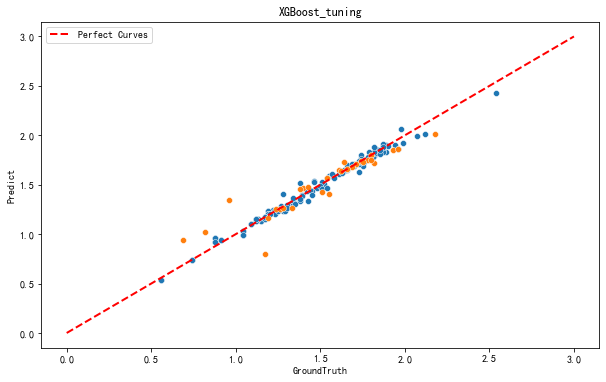

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
X_grid = {
    'n_estimators': [20,30,40],
    'max_depth': [2,3,4],
    'random_state':[2024],
    'subsample': [0.7,0.75],
    'reg_alpha': [0.1,0.2],
#     'reg_lambda': [0.1],
#     'colsample_bytree': [0.]
    
}

X_model = XGBRegressor()

X_grid_search = GridSearchCV(X_model,X_grid,scoring='neg_mean_squared_error',cv=5)

X_grid_search.fit(X_train, y_train)


model = Model(X_grid_search, X_train, X_test, y_train, y_test, 'XGBoost_tuning', '2')

visual(model, 'XGBoost_tuning', X_train, X_test, y_train, y_test)

In [4]:
save_model(X_grid_search, 'XGBoost_tuning_2')

save XGBoost_tuning_2 model successful
